## Task 5 -- To Explore Business Analytics

## Name -- Adarsh Sharma

In [1]:
# Importing the required Libraries for this Task
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Now read the given csv file for the EDA
 
df = pd.read_csv('SampleSuperstore.csv')
print("Data imported successfully")
df.head()

Data imported successfully


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#In this we should find the whole information odf the given data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
# In this we should find whole descrpition of the given data.
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
#In this we find all the maximum values of each coloumn.
df.max()

Ship Mode       Standard Class
Segment            Home Office
Country          United States
City                      Yuma
State                  Wyoming
Postal Code              99301
Region                    West
Category            Technology
Sub-Category            Tables
Sales                  22638.5
Quantity                    14
Discount                   0.8
Profit                 8399.98
dtype: object

In [6]:
#In this we find all the mainimum values of each coloumn.
df.min()

Ship Mode         First Class
Segment              Consumer
Country         United States
City                 Aberdeen
State                 Alabama
Postal Code              1040
Region                Central
Category            Furniture
Sub-Category      Accessories
Sales                   0.444
Quantity                    1
Discount                    0
Profit               -6599.98
dtype: object

In [7]:
#For the Uniquie Values
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [8]:
#For finding the Missing Values
df.isna().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [9]:
#Computing Pairwise Correlation of Columns
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


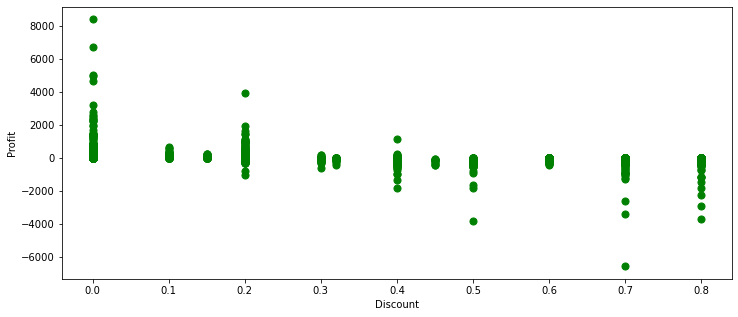

In [10]:
#For create the scatter plot 
df.plot.scatter(x='Discount',y='Profit',c='green',s=50,figsize=(12,5))
plt.show()

In [11]:
#Sperad plot for 3D Visulization
df[['Discount','Profit']].iplot(kind='spread')

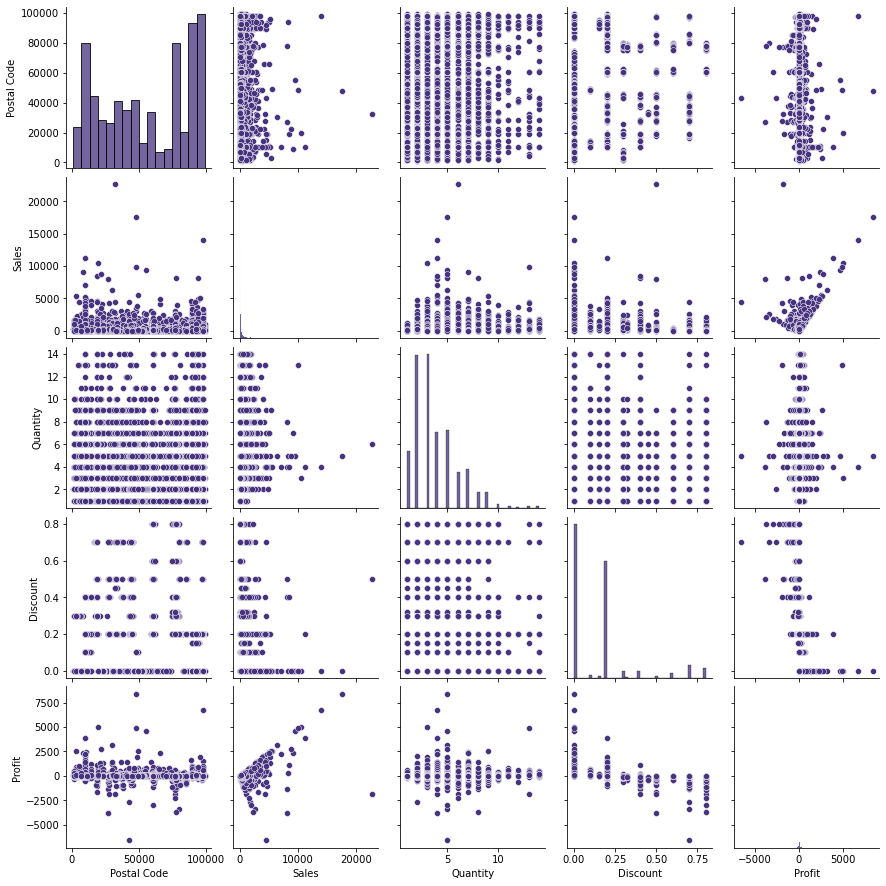

In [12]:
#All data in one code
sns.set_palette('viridis')
sns.pairplot(df)
plt.show()

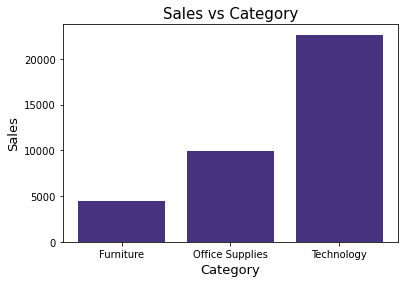

In [13]:
#Category vs Sales Bar Graph

plt.bar('Category','Sales',data=df)
plt.title('Sales vs Category',size= 15)
plt.xlabel('Category',size= 13)
plt.ylabel('Sales',size= 13)
plt.show()

       Segment  Quantity
0     Consumer     19521
1    Corporate     11608
2  Home Office      6744


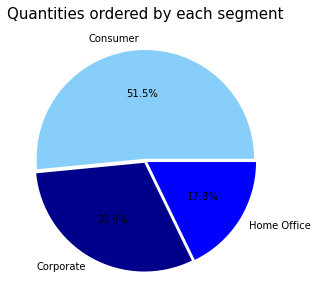

In [14]:
#Quantities Ordered by each Segment

df_group = df.groupby('Segment')['Quantity'].sum().reset_index()
print(df_group)
labels = df['Segment'].unique()
colors = ['lightskyblue', 'darkblue', 'blue']
plt.figure(figsize=(5,5))
plt.pie(df_group['Quantity'],autopct='%1.1f%%',labels=labels,explode=(0.02,0.02,0.02), colors=colors)
plt.title('Quantities ordered by each segment',size= 15)
plt.show()

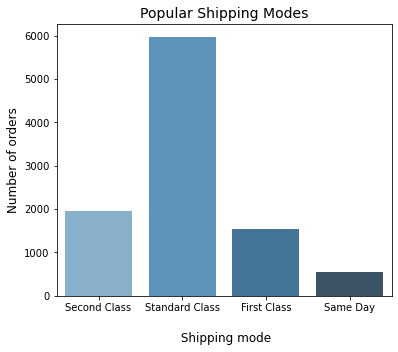

In [15]:
#Shipping Models

plt.figure(figsize=(6,5))
sns.countplot('Ship Mode',data=df, palette='Blues_d')
plt.title('Popular Shipping Modes',size=14)
plt.xlabel('\n Shipping mode',size=12)
plt.ylabel('Number of orders',size=12)
plt.xticks(fontsize=10)
plt.show()

As we can see, the standard class shipping has the most count which means the customers have opted for this type of sipping mode the most. This is because Standard class delivery will cost less compared to the the premium for same day delivery is much higher. Hence, customers choosing same day delivery is the least.

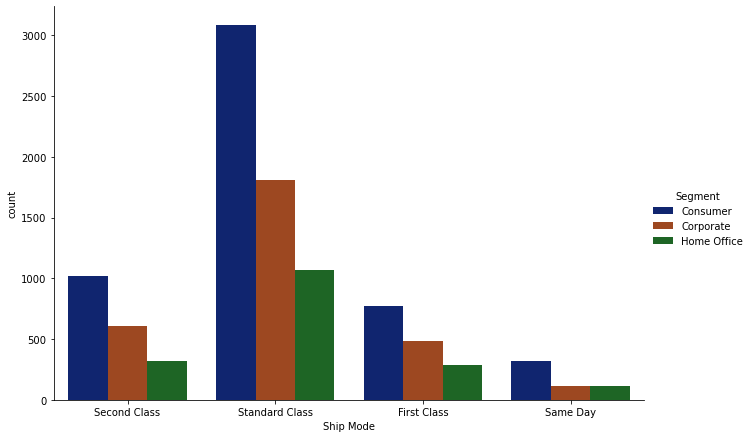

In [16]:
#Shipping Mode vs Count

sns.catplot('Ship Mode',data=df,hue='Segment',kind='count',palette='dark',aspect=1.5,height=6)
plt.show()

In [17]:

#State counts of Unique Values

df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

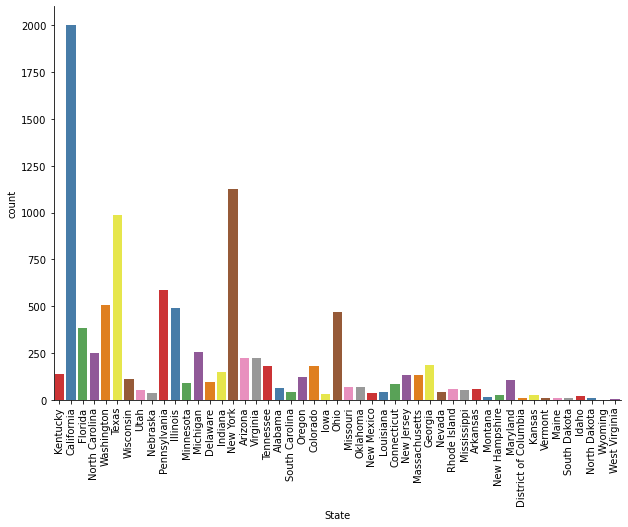

In [18]:

#Cities each of Least and Most Quantities Ordered

sns.catplot('State',kind='count',data=df,palette='Set1',height=6,aspect=1.5)
plt.xticks(rotation=90)
plt.show()

In [19]:
#Grouping by Quantity of Cities

dftop10 = df.groupby('City')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=True)
dftop10


,City,Quantity
386,Port Orange,1
259,Littleton,1
257,Lindenhurst,1
140,Elyria,1
213,Iowa City,1
...,...,...
452,Seattle,1590
438,San Francisco,1935
374,Philadelphia,1981
266,Los Angeles,2879


In [20]:
#Top 10 Most Ordering Cities

dftop10 = dftop10.head(10)
dftop10.reset_index(drop=True,inplace=True)
dftop10

,City,Quantity
0,Port Orange,1
1,Littleton,1
2,Lindenhurst,1
3,Elyria,1
4,Iowa City,1
5,Jupiter,1
6,Keller,2
7,Grand Island,2
8,Baytown,2
9,Holyoke,2


    Region  Quantity
0  Central      8780
1     East     10618
2    South      6209
3     West     12266


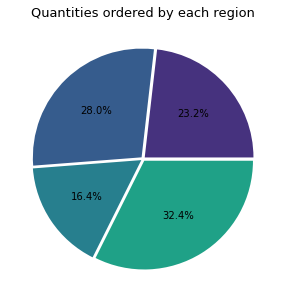

In [21]:
#Quantities Ordered Region Wise

df_region=df.groupby('Region')['Quantity'].sum().reset_index()
print(df_region)

labels = df_region['Region'].unique()
plt.figure(figsize=(5,5))
plt.pie(df_region['Quantity'],autopct='%1.1f%%',explode=(0.02,0.02,0.02,0.02),)
plt.title('Quantities ordered by each region',size=13)

plt.show()

In [22]:
#Highest Selling Categories

df_cats = df.groupby('Category')['Quantity'].sum().reset_index()
df_cats

,Category,Quantity
0,Furniture,8028
1,Office Supplies,22906
2,Technology,6939


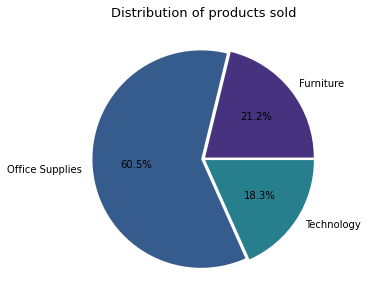

In [23]:
#Distribution of Products Sold

plt.figure(figsize=(5,5))
labels=df_cats['Category'].unique()
plt.pie(df_cats['Quantity'],autopct='%1.1f%%',labels=labels,explode=(0.02,0.02,0.02))

plt.title('Distribution of products sold',size=13)

plt.show()

          Category       Profit
0        Furniture   18451.2728
1  Office Supplies  122490.8008
2       Technology  145454.9481


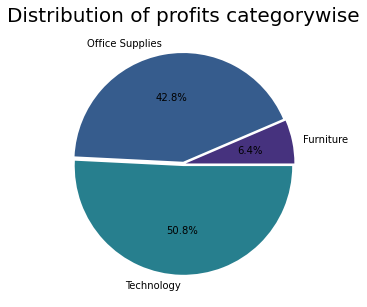

In [24]:
#Most Profitable Categories

dfprofit = df.groupby('Category')['Profit'].sum().reset_index()
print(dfprofit)
plt.figure(figsize=(5,5))
labels=dfprofit['Category'].unique()
plt.pie(dfprofit['Profit'],autopct='%1.1f%%',labels=labels,explode=(0.02,0.02,0.02))

plt.title('Distribution of profits categorywise',size=20)
plt.show()

In [25]:

#Most Profitable Products

dftop10_items = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
dftop10_items.reset_index(drop=True,inplace=True)
dftop10_items=dftop10_items.head(10)
dftop10_items

,Sub-Category,Profit
0,Copiers,55617.8249
1,Phones,44515.7306
2,Accessories,41936.6357
3,Paper,34053.5693
4,Binders,30221.7633
5,Chairs,26590.1663
6,Storage,21278.8264
7,Appliances,18138.0054
8,Furnishings,13059.1436
9,Envelopes,6964.1767


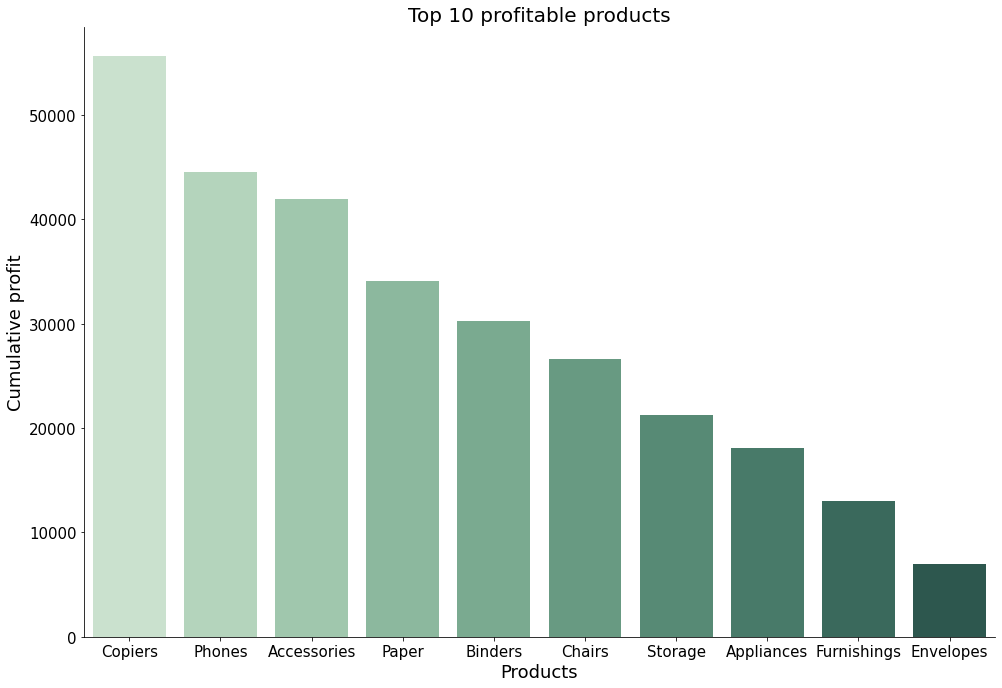

In [26]:
#Visualizing the Top 10 Profitable Products

sns.catplot('Sub-Category','Profit',data=dftop10_items,kind='bar',aspect=1.5,height=9,palette='ch:2.5,-.2,dark=.3')
plt.title('Top 10 profitable products',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Cumulative profit',size=18)
plt.xlabel('Products',size=18)

plt.show()

In [27]:

#Top Profitable cities

dftop10_cities = df.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)

dftop10_cities = dftop10_cities.head(10)
dftop10_cities

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


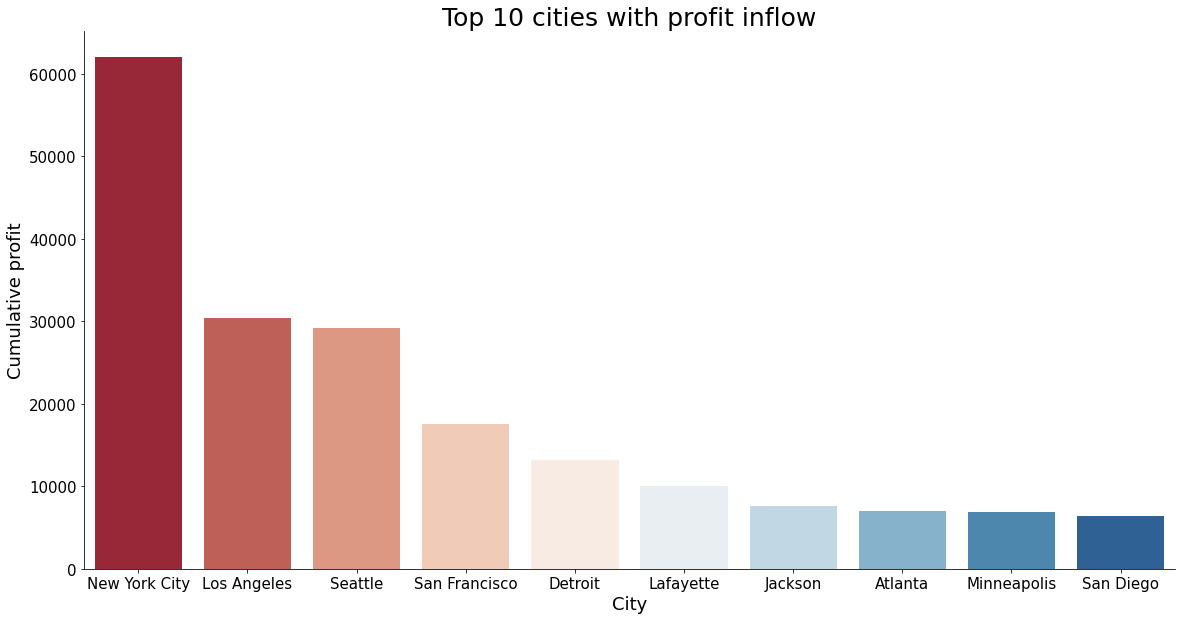

In [28]:
#Visualizing the Top 10 Profitable Cities

sns.catplot('City','Profit',data=dftop10_cities,kind='bar',aspect=2,height=8,palette='RdBu')
plt.title('Top 10 cities with profit inflow',size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Cumulative profit',size=18)
plt.xlabel('City',size=18)

plt.show()

## Conclusion¶
### From above Data Visualization we can conclude as follow:
#### Data Quality: Good quality data with no need for data preprocessing. No null values in Data set.
#### Sales: 22,97,201
#### Profit: 2,86,397
#### 'Standard Class' accounts for the majority of profit.
#### 'HomeOffice' segment generates least sale.
### In central region Furniture incures loss.
#### 'Florida', 'Oregon', 'Arizona', 'Illinois', 'Texas', 'Pennsylvania', 'Tennessee', 'North Carlina', 'Colorado' and 'Ohio' have noticeably less Profit